In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
import pandas as pd

In [3]:
IN_PATH: str = '../results/training/_raw'
OUT_PATH: str = '../results/training'

In [4]:
DATASETS: list = ['train', 'test']

In [5]:
MODELS: list = [ 'base', 'textattack', 'fabriceyhc', 'wakaka']

In [6]:
### Analyse training along epochs

In [7]:
def convert_to_multi_col(df:pd.DataFrame, meta_col: str) -> pd.DataFrame:
    df.columns = pd.MultiIndex.from_product([[meta_col], df.columns], names=['model', 'metric'])

    return df

In [8]:
training: pd.DataFrame = (
    pd.concat(
    [(
        pd
        .read_csv(f'{IN_PATH}/{model}.metric.training.csv', index_col=0)
        .pipe(convert_to_multi_col, model)
    )
        for model in MODELS],
    axis=1)
)

In [9]:
training.to_csv(f'{OUT_PATH}/train.full.csv')
training

model        base                                               textattack  \
metric loss_train loss_test  f1_train   f1_test        duration loss_train   
epoch                                                                        
1        0.343233  0.338719  0.852789  0.852587  0:00:09.668784   0.090434   
2        0.307729  0.326901  0.870257  0.858070  0:00:09.572611   0.080465   
3        0.295009  0.281795  0.877525  0.880287  0:00:09.547557   0.074212   
4        0.288303  0.282079  0.880055  0.880529  0:00:09.568807   0.071654   
5        0.286963  0.298477  0.882022  0.872384  0:00:09.723108   0.069381   
...           ...       ...       ...       ...             ...        ...   
96       0.113739  0.429951  0.945830  0.889924  0:00:08.684905   0.010093   
97       0.108427  0.433491  0.947075  0.890972  0:00:08.694592   0.012433   
98       0.112546  0.435157  0.946713  0.888029  0:00:08.698532   0.012706   
99       0.108437  0.494099  0.947557  0.888230  0:00:08.726006   0.013844   
100      0.106169  0.505802  0.950367  0.882384  0:00:08.810596   0.010980   

model                                                fabriceyhc            \
metric loss_test  f1_train   f1_test        duration loss_train loss_test   
epoch                                                                       
1       0.201433  0.967755  0.934357  0:00:08.705031   0.053728  0.235835   
2       0.218280  0.971530  0.929237  0:00:08.687009   0.049393  0.218563   
3       0.229594  0.972935  0.934196  0:00:08.710527   0.048638  0.332823   
4       0.241140  0.974862  0.932462  0:00:08.607995   0.047800  0.272608   
5       0.220475  0.975023  0.932664  0:00:08.844395   0.047182  0.230460   
...          ...       ...       ...             ...        ...       ...   
96      0.729500  0.994579  0.931817  0:00:09.048059   0.023699  0.472859   
97      0.667817  0.994258  0.929761  0:00:09.013151   0.021013  0.571112   
98      0.632887  0.994057  0.929237  0:00:08.932167   0.019619  0.579133   
99      0.644918  0.994258  0.931696  0:00:08.996109   0.021750  0.478141   
100     0.659987  0.995342  0.930285  0:00:09.150759   0.022505  0.545479   

model                                          wakaka                      \
metric  f1_train   f1_test        duration loss_train loss_test  f1_train   
epoch                                                                       
1       0.984098  0.932301  0:00:09.021376   0.283266  0.259142  0.884632   
2       0.985986  0.930769  0:00:08.916055   0.269048  0.257580  0.889853   
3       0.985945  0.930003  0:00:08.822648   0.261387  0.249518  0.894189   
4       0.986548  0.932341  0:00:08.934248   0.255489  0.248275  0.896599   
5       0.986508  0.932462  0:00:09.234810   0.251836  0.247597  0.897924   
...          ...       ...             ...        ...       ...       ...   
96      0.992330  0.929196  0:00:09.668125   0.103378  0.405929  0.956351   
97      0.993615  0.928713  0:00:09.763579   0.105295  0.393021  0.955949   
98      0.993936  0.929882  0:00:09.720812   0.101766  0.384666  0.958077   
99      0.993374  0.929519  0:00:09.710189   0.099981  0.473264  0.958158   
100     0.993455  0.931495  0:00:09.951089   0.103536  0.453354  0.956310   

model                             
metric   f1_test        duration  
epoch                             
1       0.891456  0:00:09.755657  
2       0.896254  0:00:09.709849  
3       0.898149  0:00:09.467708  
4       0.898996  0:00:09.016544  
5       0.897746  0:00:09.224361  
...          ...             ...  
96      0.902867  0:00:09.011410  
97      0.901415  0:00:08.954484  
98      0.901778  0:00:08.949227  
99      0.893069  0:00:08.886320  
100     0.903673  0:00:09.214288  

[100 rows x 20 columns]

In [10]:
training_subset = (
    training
    .filter(regex="f1_.*")
    .iloc[range(9, 100, 10)]
)

In [11]:
training_subset.to_csv(f'{OUT_PATH}/train.subset.csv')
training_subset.style.to_latex(f'{OUT_PATH}/_tex/train.subset.tex')
display(training_subset)
# print(training_subset.to_markdown())

model       base           textattack           fabriceyhc            \
metric  f1_train   f1_test   f1_train   f1_test   f1_train   f1_test   
epoch                                                                  
10      0.892985  0.887505   0.978517  0.934156   0.987471  0.931333   
20      0.902662  0.889480   0.984259  0.932180   0.988034  0.931212   
30      0.912501  0.891738   0.986949  0.930809   0.988756  0.931696   
40      0.921375  0.887827   0.990202  0.930285   0.990041  0.930245   
50      0.930290  0.884642   0.991447  0.931293   0.990764  0.929680   
60      0.932378  0.890851   0.992732  0.929600   0.991969  0.930164   
70      0.938281  0.886617   0.993736  0.930325   0.992491  0.929398   
80      0.942055  0.891174   0.994137  0.933108   0.992611  0.928632   
90      0.944906  0.882384   0.994097  0.930083   0.993133  0.928551   
100     0.950367  0.882384   0.995342  0.930285   0.993455  0.931495   

model     wakaka            
metric  f1_train   f1_test  
epoch                       
10      0.905192  0.902101  
20      0.915271  0.901536  
30      0.923021  0.903189  
40      0.931454  0.904883  
50      0.937397  0.898875  
60      0.945509  0.900165  
70      0.947195  0.897827  
80      0.951050  0.902625  
90      0.953741  0.900085  
100     0.956310  0.903673

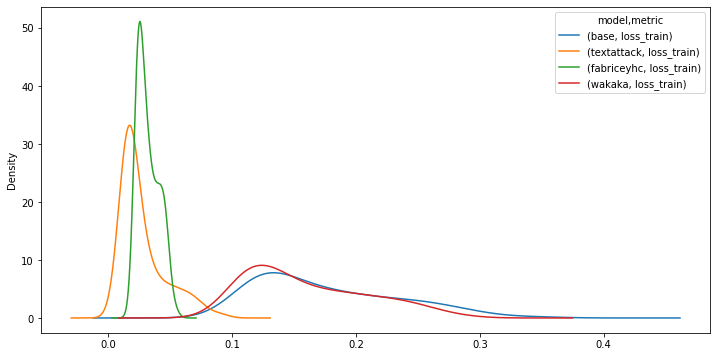

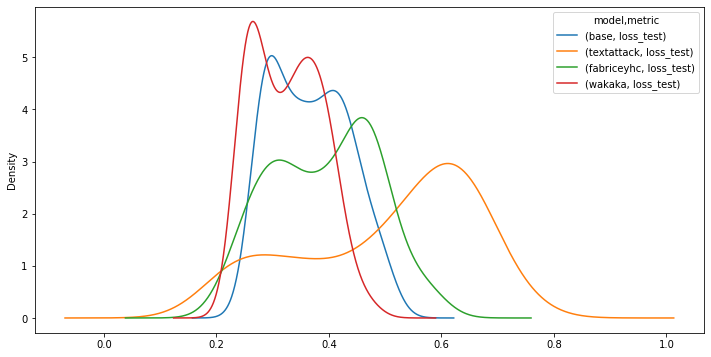

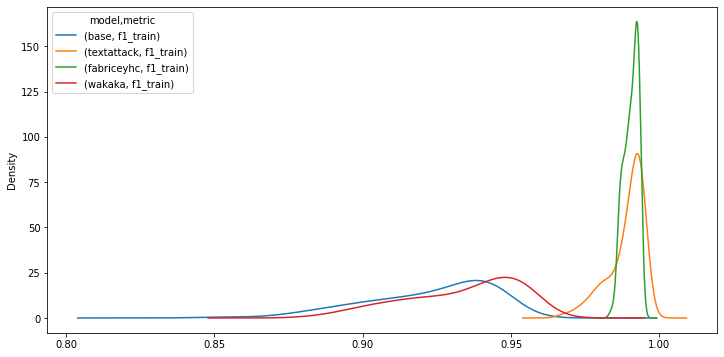

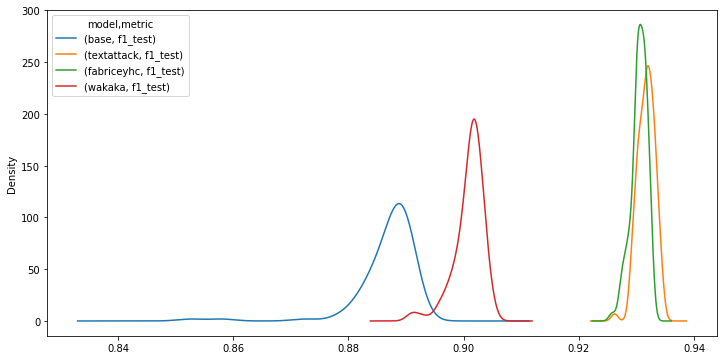

In [12]:
for metric in ['loss', 'f1']:
    for label in DATASETS:
        training.filter(regex=f'{metric}_{label}').plot.kde()
        plt.savefig(f'{OUT_PATH}/{metric}.{label}.density.png')

In [13]:
test: pd.DataFrame = (
    pd.concat(
    [(
        pd
        .read_csv(f'{IN_PATH}/{model}.metric.test.csv', index_col=0)
        .pipe(convert_to_multi_col, model)
    )
        for model in MODELS],
    axis=1)
    .round(3)
)

In [14]:
test.to_csv(f'{OUT_PATH}/test.full.csv')
test

model      base                                                textattack  \
metric       tp    fp     tn    fn   prec    rec     f1    acc         tp   
label                                                                       
AVG       22116  2685  22116  2685  0.892  0.892  0.892  0.892      23177   
negative  10956  1280  11160  1405  0.895  0.886  0.891  0.892      11598   
positive  11160  1405  10956  1280  0.888  0.897  0.893  0.892      11579   

model           ... fabriceyhc        wakaka                                   \
metric      fp  ...         f1    acc     tp    fp     tn    fn   prec    rec   
label           ...                                                             
AVG       1624  ...      0.933  0.933  22442  2359  22442  2359  0.905  0.905   
negative   861  ...      0.933  0.933  11116  1114  11326  1245  0.909  0.899   
positive   763  ...      0.933  0.933  11326  1245  11116  1114  0.901  0.910   

model                   
metric       f1    acc  
label                   
AVG       0.905  0.905  
negative  0.904  0.905  
positive  0.906  0.905  

[3 rows x 32 columns]

In [15]:
test_subset = (
    test
    .filter(regex="(prec|rec|f1)")
)

In [16]:
test_subset.to_csv(f'{OUT_PATH}/test.subset.csv')
test_subset.style.to_latex(f'{OUT_PATH}/_tex/test.subset.tex')
display(test_subset)
# print(test_subset.to_markdown())

model      base               textattack               fabriceyhc         \
metric     prec    rec     f1       prec    rec     f1       prec    rec   
label                                                                      
AVG       0.892  0.892  0.892      0.935  0.935  0.935      0.933  0.933   
negative  0.895  0.886  0.891      0.931  0.938  0.935      0.930  0.935   
positive  0.888  0.897  0.893      0.938  0.931  0.934      0.935  0.930   

model           wakaka                
metric       f1   prec    rec     f1  
label                                 
AVG       0.933  0.905  0.905  0.905  
negative  0.933  0.909  0.899  0.904  
positive  0.933  0.901  0.910  0.906